# Task 1 - model of gaussian wave packet

In [1]:
# modules

import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy.fft import ifft

d:\Users\rewas\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


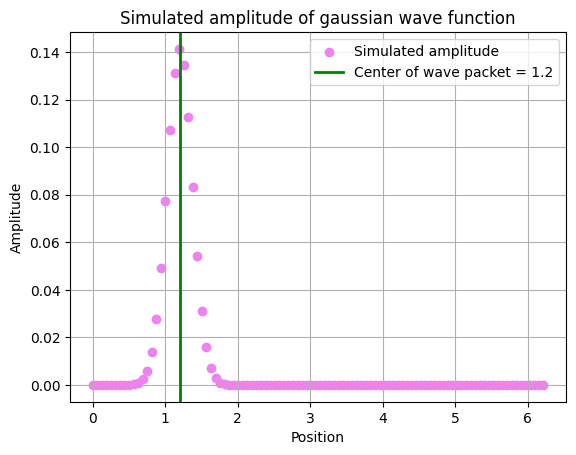

Norm of wave packet in position representation is equal to 1.0


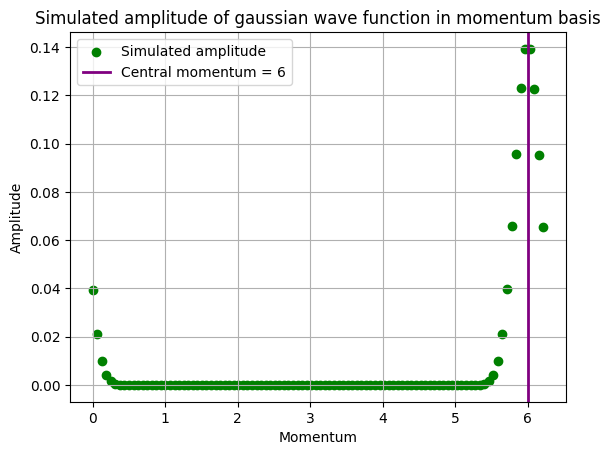

Norm of wave packet in momentum representation is equal to 1.0


In [2]:
positions = np.linspace(0, 2*np.pi, 100, endpoint = False)
hbar = 2*np.pi / 100

# gaussian wave packet

def gauss(x, x_0, m_0):

    phase = np.exp(1j*m_0*x/hbar)
    amplit = np.zeros(len(x), dtype = complex)
    for d in range(-4, 5):
        amplit += np.exp(-(x-x_0 + 2*np.pi*d)**2/(2*hbar))
    output = amplit*phase / np.linalg.norm(amplit*phase)

    return output

# plot amplitude

x_zero = 1.2
m_zero = 6

x_vector = gauss(positions, x_zero, m_zero)

plt.scatter(positions, x_vector*x_vector.conjugate(), color = "violet")
plt.xlabel("Position")
plt.ylabel("Amplitude")
plt.title("Simulated amplitude of gaussian wave function")
plt.grid()
plt.axvline(x_zero, color = "green", linewidth = 2)
plt.legend(["Simulated amplitude", "Center of wave packet = {}".format(x_zero)])
plt.show()

x_norm = np.linalg.norm(x_vector)
print("Norm of wave packet in position representation is equal to {}".format(x_norm))

# moving to momentum representation

momentums = positions.copy()
m_vector = fft(gauss(positions, x_zero, m_zero), norm = "ortho")

# and plotting the results

plt.scatter(momentums, m_vector*m_vector.conjugate(), color = "green")
plt.axvline(m_zero, color = "purple", linewidth = 2)
plt.title("Simulated amplitude of gaussian wave function in momentum basis")
plt.legend(["Simulated amplitude", "Central momentum = {}".format(m_zero)])
plt.xlabel("Momentum")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

m_norm = np.linalg.norm(m_vector)
print("Norm of wave packet in momentum representation is equal to {}".format(m_norm))

# Task 2 - Wave packet evolution

In [3]:
# initial parameters

positions = np.linspace(0, 2*np.pi, 1000, endpoint = False)
momentums = positions.copy()
hbar = 2*np.pi / 1000
x_zero = 3.14
m_zero = 0.3
K = 1.1

x_vector = gauss(positions, x_zero, m_zero)

# function performing one step on system

def quantum_step(K):

    V_phase = np.exp(-1j/hbar*K*np.cos(positions))
    P_phase = np.exp(-1j/hbar*momentums**2)
    output = V_phase * x_vector
    output = fft(output, norm = "ortho")
    output *= P_phase
    output = ifft(output, norm = "ortho")
    return output

# model evolution and save results to file

steps = 20

for i in range(1, steps+1):

    plt.scatter(positions, x_vector*x_vector.conjugate(), color = "violet")
    plt.xlabel("Position")
    plt.ylabel("Amplitude")
    plt.title("Simulated amplitude of gaussian wave function")
    plt.grid()
    plt.legend(["Simulated amplitude"], bbox_to_anchor = [1, 1])

    save_path = "Lab2/K={}, x={}, m={}".format(K,x_zero,m_zero,i,steps)
    if not os.path.exists(save_path):
        os.makedirs(save_path)

    plt.savefig(fname = save_path + "/{} out of {}.jpg".format(i,steps))
    plt.close()

    x_vector = quantum_step(K)


d:\Users\rewas\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
d:\Users\rewas\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
d:\Users\rewas\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
d:\Users\rewas\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
d:\Users\rewas\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\collections.py:192: ComplexWarni

In [4]:
# initial parameters

positions = np.linspace(0, 2*np.pi, 1000, endpoint = False)
momentums = positions.copy()
hbar = 2*np.pi / 1000
x_zero = 3.14
m_zero = 0.3
K = 1.1

x_vector = gauss(positions, x_zero, m_zero)

# classic evolution

def step(x, m, K):
    m_new = m + K*np.sin(x)
    x_new = (x + m_new)%(2*np.pi)
    return x_new, m_new

def step_periodic(x, m, K):
    xnew, mnew = step(x, m, K)
    mnew = mnew % (2*np.pi)
    return xnew, mnew

x_0 = x_zero
m_0 = m_zero

# wave function "median"

def median(ket):

    sum = 0
    i = 0
    while sum < 0.5:
        sum += ket[i]
        i+=1

    return i/1000 * 2 * np.pi

# model evolution and save results to file

steps = 20

for i in range(1, steps+1):

    plt.scatter(positions, x_vector*x_vector.conjugate(), color = "violet")
    plt.scatter([x_0], [np.max(x_vector*x_vector.conjugate()/2)], color = "green", s = 200, alpha = 0.5)
    plt.scatter([median(x_vector*x_vector.conjugate())], [np.max(x_vector*x_vector.conjugate()/3)], color = "navy", s = 50, alpha = 0.5)
    plt.xlabel("Position")
    plt.ylabel("Amplitude")
    plt.title("Evolution of gaussian wave function vs. classical particle")
    plt.grid()
    plt.legend(["Simulated amplitude", "Classical particle", "Wave function median"], loc = "upper right")

    save_path = "Lab2/K={}, x={}, m={} classic".format(K,x_zero,m_zero,i,steps)
    if not os.path.exists(save_path):
        os.makedirs(save_path)

    plt.savefig(fname = save_path + "/{} out of {}.jpg".format(i,steps))
    plt.close()

    x_vector = quantum_step(K)
    x_0, m_0 = step_periodic(x_0, m_0, K)

d:\Users\rewas\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
d:\Users\rewas\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
d:\Users\rewas\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
d:\Users\rewas\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
d:\Users\rewas\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\collections.py:192: ComplexWarni